In [1]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [2]:
def get_coauthor_matrix(df, name_str, coauthor_str):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: numpy array NxN with number of shared co-authored publications
    '''
    names = df.loc[:,name_str]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author[name_str]
        # row = names[names == auth_name].index[0]
        row = idx
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor] #number of publications together
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [23]:
sv_df = pd.read_csv("../SciVal Documents/Outputs/sv_ss_output_data.csv",sep="|")
gs_df = pd.read_csv("../../Example Outputs/ss_output_data.csv",sep="|")

# get names for axes
sv_names = sv_df["Name"].tolist()
gs_names = gs_df["Name"].tolist()

# get coauthor information for comparison
sv_coauthors = sv_df["Coauthors"].tolist()
gs_coauthors = gs_df["Coauthors"].tolist()

# get document count information for comparison
sv_doccount = sv_df["Document Count"].tolist()
gs_doccount = gs_df["Document Count"].tolist()

In [ ]:
oa_df = pd.read_csv("../OpenAlex Documents/Outputs/oa_ss_output_data.csv",sep="|")
oa_names = oa_df["Name"].tolist()
oa_coauthors = oa_df["Coauthors"].tolist()
oa_doccount = oa_df["Coauthors"].tolist()

In [5]:
#create matrix
sv_coauthor_matrix = get_coauthor_matrix(sv_df, "Name", "Coauthors")
gs_coauthor_matrix = get_coauthor_matrix(gs_df, "Name", "Coauthors")

Mark Cembrowski has no coauthors
Michael Gordon has no coauthors
Manu Madhav has no coauthors
Emily Sylwestrak has no coauthors
Randy Mcintosh has no coauthors


Michael Gordon has no coauthors
Manu Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [6]:
# adjust weights for matrix edges: the higher the publication count, the shorter the distance between nodes
sv_coauthor_matrix[sv_coauthor_matrix > 0] = 1/sv_coauthor_matrix[sv_coauthor_matrix > 0]
gs_coauthor_matrix[gs_coauthor_matrix > 0] = 1/gs_coauthor_matrix[gs_coauthor_matrix > 0]

# find weighted betweenness centrality
gs_weighted_BC = bct.betweenness_wei(sv_coauthor_matrix)
sv_weighted_BC = bct.betweenness_wei(gs_coauthor_matrix)

# find degrees for comparison
sv_deg = bct.degrees_und(sv_coauthor_matrix)
gs_deg = bct.degrees_und(gs_coauthor_matrix)

# normalize for undirected graph
gs_weighted_BC_normed = gs_weighted_BC*2/((len(gs_weighted_BC)-1)*(len(gs_weighted_BC)-2))
sv_weighted_BC_normed = sv_weighted_BC*2/((len(sv_weighted_BC)-1)*(len(sv_weighted_BC)-2))

In [7]:
print(gs_weighted_BC_normed)
print(sv_weighted_BC_normed)

[0.70707071 0.         0.18181818 0.13939394 0.1030303  0.02626263
 0.         0.45454545 0.45656566 0.00606061 0.         0.21616162
 0.54747475 0.         0.52121212 0.         0.         0.0969697
 0.18181818 0.03636364 0.         0.         0.         0.
 0.         0.         0.36969697 0.         0.00606061 0.0040404
 0.         0.07474747 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.26060606
 0.         0.         0.07474747 0.05454545]
[0.76363636 0.         0.27878788 0.12626263 0.15858586 0.05252525
 0.05959596 0.23232323 0.37272727 0.01010101 0.         0.15353535
 0.14141414 0.         0.08080808 0.         0.02424242 0.44545455
 0.61717172 0.11919192 0.         0.         0.         0.04040404
 0.         0.         0.08686869 0.         0.         0.24848485
 0.09090909 0.07878788 0.         0.         0.         0.
 0.         0.07878788 0.         0.         0.00707071 0.30505051
 0.         0.         0.         0.274747

# Google Scholar only degree and betweenness centrality

In [8]:
#single source plot
gs_df = pd.DataFrame({
    'Author': gs_names,
    'Degree': gs_deg,
    'Betweenness Centrality': gs_weighted_BC_normed,
})

In [9]:
#order the dataframe in descending BC order
ordered_gs_df = gs_df.sort_values(
    by="Betweenness Centrality", 
    ascending=False, 
    ignore_index=True
    )

In [10]:
font_color = '#525252'
deg_color = '#fd625e'
BC_color = '#01b8aa'
index = ordered_gs_df.index
authors = ordered_gs_df['Author']
deg_col = ordered_gs_df['Degree']
BC_col = ordered_gs_df['Betweenness Centrality']
title_deg = 'Degree\nNumber of Direct Co-Authors'
title_BC = 'Betweenness Centrality\nFraction of Shortest Paths'

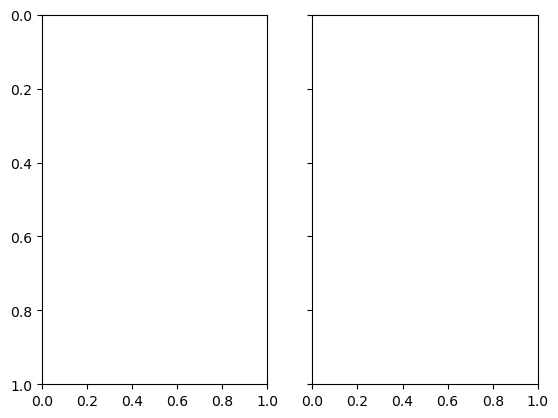

In [11]:
fig, axes = plt.subplots(
    ncols=2, 
    sharey=True #data shares the same y-axis
    )
axes[0].invert_yaxis()

<BarContainer object of 46 artists>

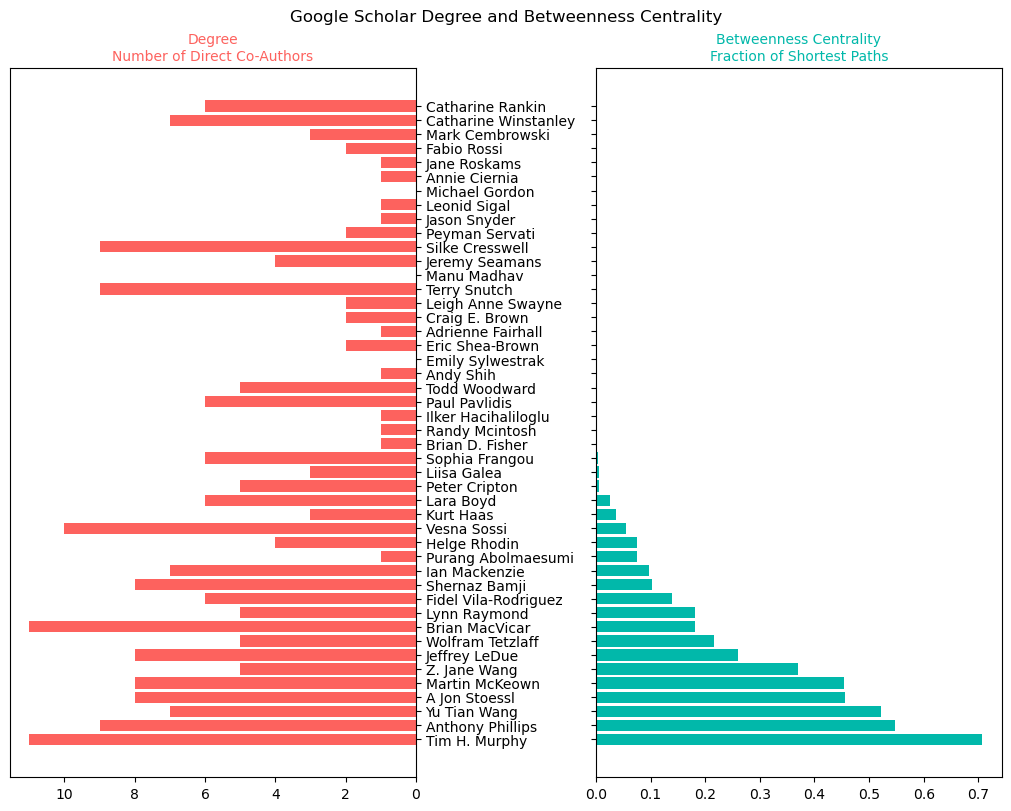

In [12]:
fig, axes = plt.subplots(
    layout='constrained',
    figsize=(10,8), #1000x800px figure
    ncols=2, 
    sharey=True #data shares the same y-axis
    )

axes[0].invert_xaxis()

#set titles
fig.suptitle("Google Scholar Degree and Betweenness Centrality")
axes[0].set_title(title_deg, fontsize=10, color=deg_color)
axes[1].set_title(title_BC, fontsize=10, color=BC_color)

#plot degree axis
axes[0].barh(authors, deg_col, align='center', color=deg_color)
axes[0].yaxis.tick_right()

#plot betweenness centrality axis
axes[1].barh(authors, BC_col, align='center', color=BC_color)

# Google Scholar and SciVal degree and betweenness centrality comparison

In [13]:
#get necessary data for multiple sources
combined_df = pd.DataFrame({
    "Author": gs_names,
    "SciVal Coauthors": sv_coauthors,
    "Google Scholar Coauthors": gs_coauthors,
    "SciVal Degrees": sv_deg,
    "Google Scholar Degrees": gs_deg,
    "SciVal Betweenness Centrality": sv_weighted_BC_normed,
    "Google Scholar Betweenness Centrality": gs_weighted_BC_normed,
    "SciVal Document Count": sv_doccount,
    "Google Scholar Document Count": gs_doccount,
})

#order dataframe
ordered_df = combined_df.sort_values(
    by="Google Scholar Betweenness Centrality", 
    ascending=False, 
    ignore_index=True
    )

In [14]:
degrees = pd.DataFrame({
    "Google Scholar Degrees": ordered_df["Google Scholar Degrees"],
    "SciVal Degrees": ordered_df["SciVal Degrees"],
})

BCs = pd.DataFrame({
    "Google Scholar Betweenness Centrality": ordered_df["Google Scholar Betweenness Centrality"],
    "SciVal Betweenness Centrality": ordered_df["SciVal Betweenness Centrality"],
})

In [15]:
font_color = 'black'
sv_colors = {
    "degree":'mediumturquoise',
    "BC":'gold'
}
gs_colors = {
    "degree":'darkcyan',
    "BC":'darkgoldenrod'
}
# sv_deg_color = 'red'
# sv_BC_color = 'orange'
# gs_deg_color = 'blue'
# gs_BC_color = 'green'
index = ordered_df.index
authors = ordered_df['Author']
# deg_col = ordered_gs_df['Degree']
# BC_col = ordered_gs_df['Betweenness Centrality']
title_deg = 'Degree\nNumber of Direct Co-Authors'
title_BC = 'Betweenness Centrality\nFraction of Shortest Paths'

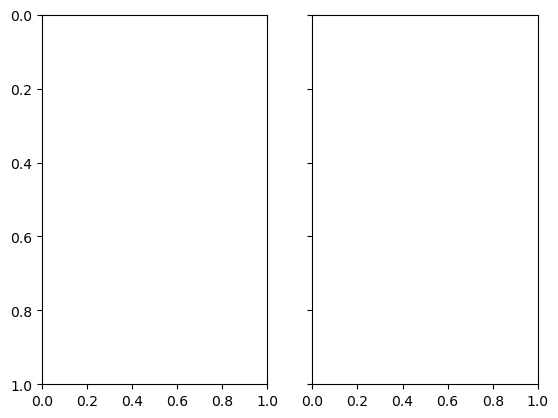

In [16]:
#invert y axis for graph
fig, axes = plt.subplots(
    ncols=2, 
    sharey=True #data shares the same y-axis
    )
axes[0].invert_yaxis()

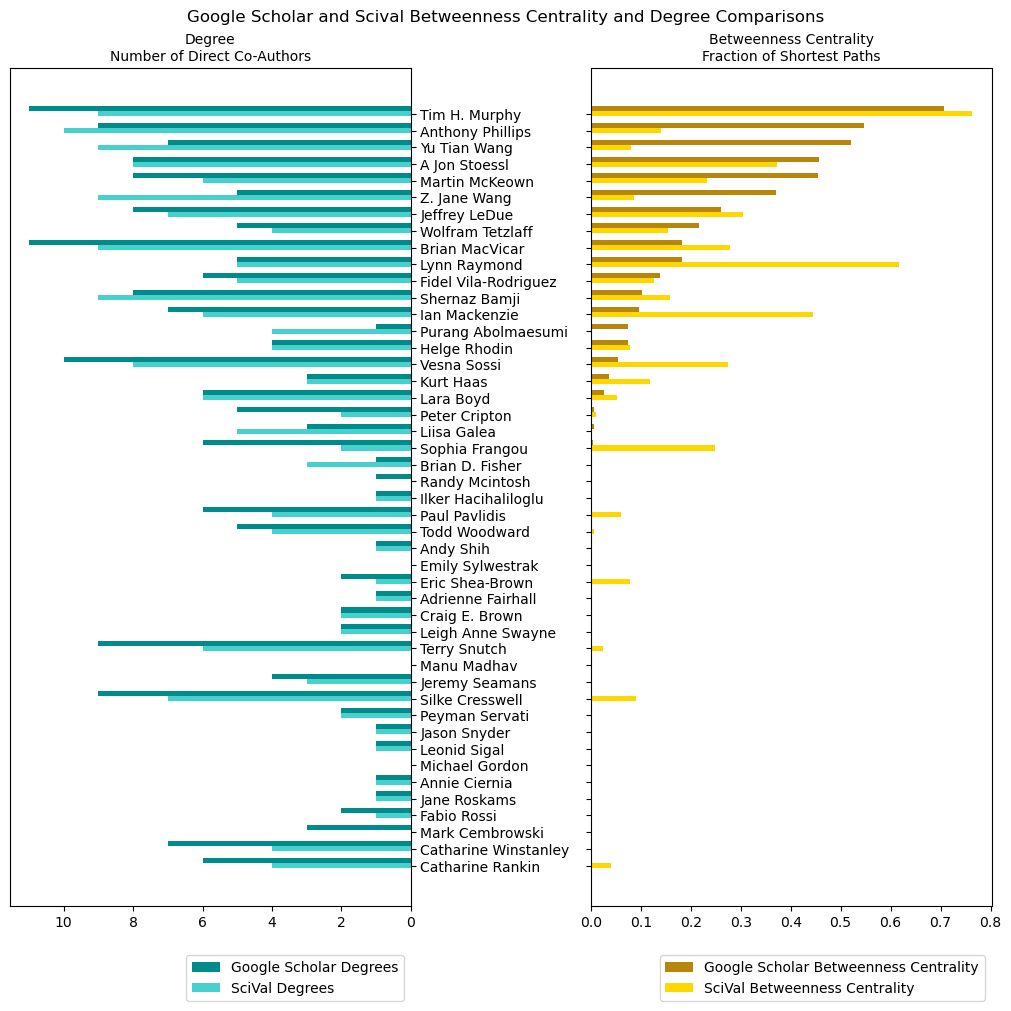

In [17]:
fig, axes = plt.subplots(
    layout='constrained',
    figsize=(10,10), #1000x1000px figure
    ncols=2, 
    sharey=True #data shares the same y-axis
    )

x = np.arange(len(ordered_df["Author"]))
width = 0.3
multiplier = 0

#modify axes
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_right()
axes[0].set_yticks(x + width, labels=ordered_df["Author"].to_list());

#plot degrees
axes[0].set_title(title_deg, fontsize=10)
for source, data in degrees.items():
    if "Google" in source: color = gs_colors["degree"]
    else: color = sv_colors["degree"]
    offset = width * multiplier
    axes[0].barh(x + offset, data, width, label=source, color=color)
    multiplier += 1

#plot BC
multiplier = 0
axes[1].set_title(title_BC, fontsize=10)
for source, data in BCs.items():
    if "Google" in source: color = gs_colors["BC"]
    else: color = sv_colors["BC"]
    offset = width * multiplier
    axes[1].barh(x + offset, data, width, label=source, color=color)
    multiplier += 1

axes[0].legend(bbox_to_anchor=(1, -0.05));
axes[1].legend(bbox_to_anchor=(1, -0.05));

fig.suptitle("Google Scholar and Scival Betweenness Centrality and Degree Comparisons")
plt.show()

In [22]:
ordered_df.to_csv("GS_SciVal_comparison.csv",index=False)

# database comparison graph with a cutoff

In [19]:
cutoff = {}
for key in ordered_df:
    cutoff[key] = ordered_df[key][:15] #15 authors with highest BC value

cutoff_df = pd.DataFrame(cutoff)

degrees = pd.DataFrame({
    "Google Scholar Degrees": cutoff_df["Google Scholar Degrees"],
    "SciVal Degrees": cutoff_df["SciVal Degrees"],
})

BCs = pd.DataFrame({
    "Google Scholar Betweenness Centrality": cutoff_df["Google Scholar Betweenness Centrality"],
    "SciVal Betweenness Centrality": cutoff_df["SciVal Betweenness Centrality"],
})

In [20]:
print(len(cutoff_df["Author"]))

15


In [ ]:
# #invert y axis for graph, if axes[0].invert_yaxis() has never been run before
# #running this code again will invert the already inverted axis 
# fig, axes = plt.subplots(
#     ncols=2, 
#     sharey=True #data shares the same y-axis
#     )
# axes[0].invert_yaxis()

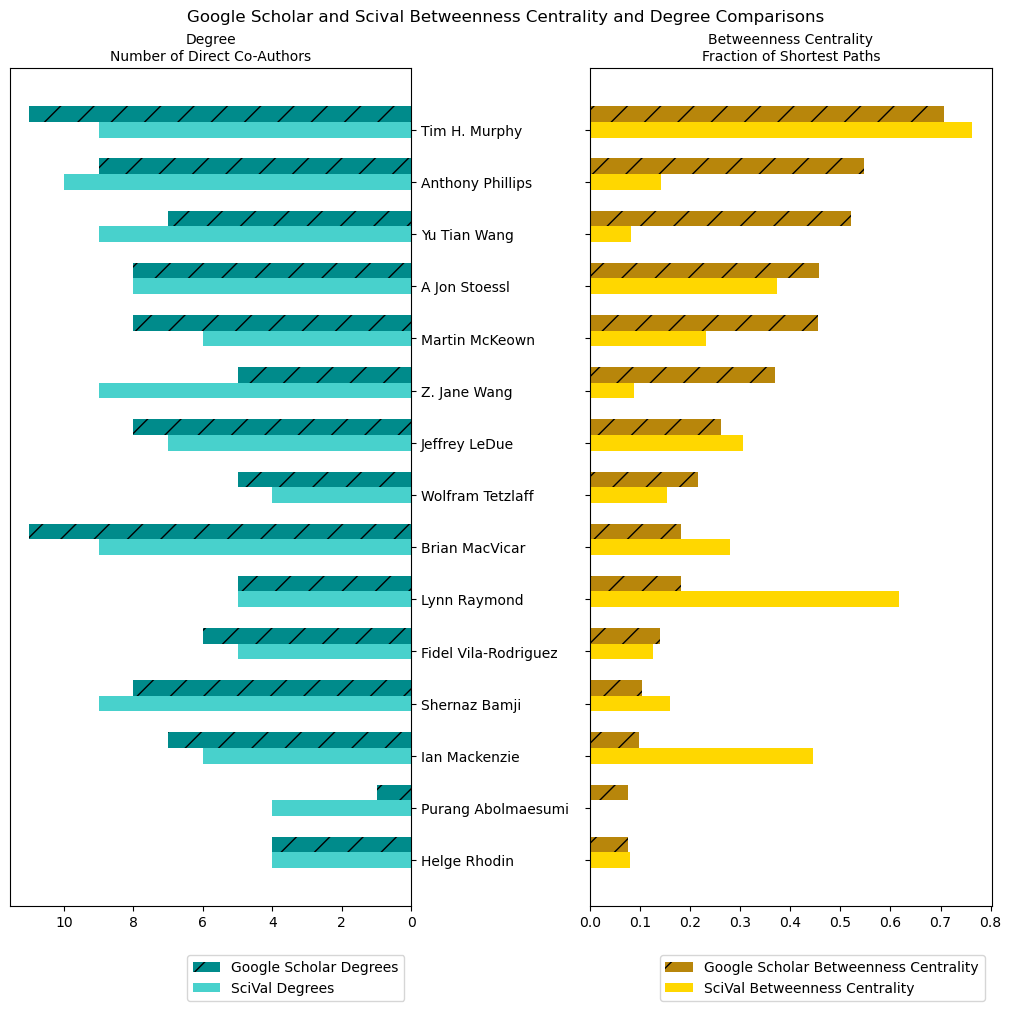

In [21]:
fig, axes = plt.subplots(
    layout='constrained',
    figsize=(10,10), #1000x1000px figure
    ncols=2, 
    sharey=True #data shares the same y-axis
    )

x = np.arange(len(cutoff_df["Author"]))
width = 0.3
multiplier = 0

#modify axes
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_right()
axes[0].set_yticks(x + width, labels=cutoff_df["Author"].to_list());

#plot degrees
axes[0].set_title(title_deg, fontsize=10)
for source, data in degrees.items():
    if "Google" in source: 
        color = gs_colors["degree"]
        hatch = "/"
    else: 
        color = sv_colors["degree"]
        hatch = ""
    offset = width * multiplier
    axes[0].barh(x + offset, data, width, label=source, color=color, hatch=hatch)
    multiplier += 1


#plot BC
multiplier = 0
axes[1].set_title(title_BC, fontsize=10)
for source, data in BCs.items():
    if "Google" in source: 
        color = gs_colors["BC"] 
        hatch = "/"
    else: 
        color = sv_colors["BC"]
        hatch = ""
    offset = width * multiplier
    axes[1].barh(x + offset, data, width, label=source, color=color, hatch = hatch)
    multiplier += 1

axes[0].legend(bbox_to_anchor=(1, -0.05));
axes[1].legend(bbox_to_anchor=(1, -0.05));

fig.suptitle("Google Scholar and Scival Betweenness Centrality and Degree Comparisons")

plt.savefig("coauthorship_network_comparison.pdf")
plt.show()

## Statistics Analysis

In [ ]:
from scipy import stats
import seaborn as sns

In [ ]:
expected_ks2samp = stats.ks_2samp(sv_weighted_BC_normed, gs_weighted_BC_normed)
print(expected_ks2samp)

KstestResult(statistic=0.15217391304347827, pvalue=0.6669293690780796, statistic_location=0.07676767676767676, statistic_sign=-1)


<Axes: ylabel='Proportion'>

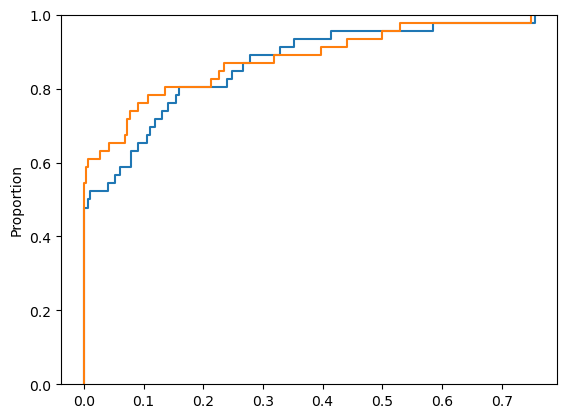

In [ ]:
sns.ecdfplot(data=sv_weighted_BC_normed)
sns.ecdfplot(data=gs_weighted_BC_normed)

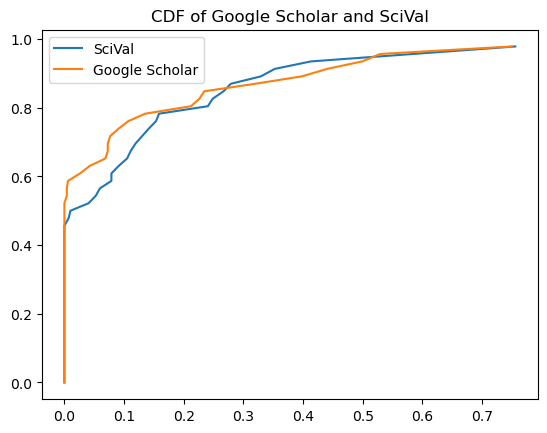

In [ ]:
sv_CDF, = plt.plot(
    np.sort(sv_weighted_BC_normed), #at every observed X,
    np.linspace( #Y value will be evenly spaced points between
        0, #start
        1, #stop
        len(sv_weighted_BC_normed), #number of samples to generate
        endpoint=False #stop (1) is not included in the sample
        ),
        label = "SciVal"
    )
gs_CDF, = plt.plot(
    np.sort(gs_weighted_BC_normed), 
    np.linspace(0, 1, len(gs_weighted_BC_normed), endpoint=False),
    label = "Google Scholar"
    )
plt.title("CDF of Google Scholar and SciVal")
plt.legend()
plt.show()

In [ ]:
#x points are the BCs in ascending order
#y points are linearly spaced
sv_x = sv_CDF.get_xdata()
sv_y_linspace = sv_CDF.get_ydata() 

gs_x = gs_CDF.get_xdata()
gs_y_linspace = gs_CDF.get_ydata()

expected_KS_location = 0.07676767676767676

#interpolate arrays to match the x values of both scival and GS data

#S = CDF of scival
#interpolate to find S(sv_x)
Ssv_x = [(x, np.interp(x, sv_x, sv_y_linspace)) for x in sv_x]#for sv x values
Sgs_x = [(x, np.interp(x, sv_x, sv_y_linspace)) for x in gs_x]#for gs x values

Sx = Ssv_x + Sgs_x + [(expected_KS_location, np.interp(expected_KS_location, sv_x, sv_y_linspace))]

#G = CDF of google scholar
#interpolate to find G(sv_x)
Gsv_x = [(x, np.interp(x, gs_x, gs_y_linspace)) for x in sv_x] #for sv x values
Ggs_x = [(x, np.interp(x, gs_x, gs_y_linspace)) for x in gs_x] #for gs x values
Gx = Gsv_x + Ggs_x + [(expected_KS_location, np.interp(expected_KS_location, gs_x, gs_y_linspace))]

In [ ]:
#find difference between S(sv_x) - G(sv_x) 
cdf_diff = [ 
    (x, abs(g_y - s_y)) for (x, s_y, g_y) in  
    zip( #zip together X and corresponding Y values
        [x for (x, y) in Sx], #for every x
        [s_y for (x, s_y) in Sx], #get y of Scival CDF
        [g_y for (x, g_y) in Gx], #get y of google scholar CDF
        )
]

# print(cdf_diff)

# find index(es) of supremum
largest_cdfy_diff = [(x, y) for x, y 
       in enumerate(cdf_diff) 
       if y[1] == max( #find largest absolute value in the y axis
           [abs(y) for (x,y) in cdf_diff]
           )
       ]

# largest_cdfy_diff = max([abs(y) for (x,y) in cdf_diff])
print(largest_cdfy_diff)

# print([cdf_diff[i] for i in largest_cdfy_diff])

[(79, (0.07676767676767676, 0.13272311212814647)), (92, (0.07676767676767676, 0.13272311212814647))]


In [ ]:
expected_ks2samp = stats.ks_2samp(gs_weighted_BC_normed,sv_weighted_BC_normed)
print(expected_ks2samp)

KstestResult(statistic=0.15217391304347827, pvalue=0.6669293690780796, statistic_location=0.07676767676767676, statistic_sign=1)


Degree K-S test comparison

In [ ]:
deg_ks2samp = stats.ks_2samp(gs_deg,sv_deg)
print(deg_ks2samp)

KstestResult(statistic=0.13043478260869565, pvalue=0.8344838759569728, statistic_location=4.0, statistic_sign=-1)


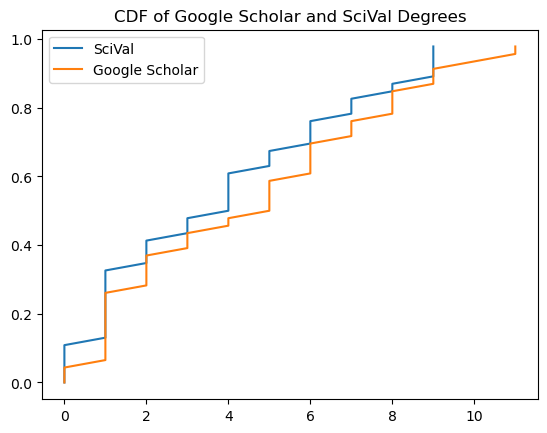

In [ ]:
sv_deg_CDF, = plt.plot(
    np.sort(sv_deg), #at every observed X,
    np.linspace( #Y value will be evenly spaced points between
        0, #start
        1, #stop
        len(sv_deg), #number of samples to generate
        endpoint=False #stop (1) is not included in the sample
        ),
        label = "SciVal"
    )
gs_deg_CDF, = plt.plot(
    np.sort(gs_deg), 
    np.linspace(0, 1, len(gs_deg), endpoint=False),
    label = "Google Scholar"
    )
plt.title("CDF of Google Scholar and SciVal Degrees")
plt.legend()
plt.show()

In [ ]:


#x points are the BCs in ascending order
#y points are linearly spaced
sv_x_deg = sv_deg_CDF.get_xdata()
sv_y_linspace_deg = sv_deg_CDF.get_ydata() 

gs_x_deg = gs_deg_CDF.get_xdata()
gs_y_linspace_deg = gs_deg_CDF.get_ydata()

expected_KS_location_deg = 4.0

#interpolate arrays to match the x values of both scival and GS data

#S = CDF of scival
#interpolate to find S(sv_x)
Ssv_x_deg = [(x, np.interp(x, sv_x_deg, sv_y_linspace_deg)) for x in sv_x_deg]#for sv x values
Sgs_x_deg = [(x, np.interp(x, sv_x_deg, sv_y_linspace_deg)) for x in gs_x_deg]#for gs x values

Sx_deg = Ssv_x_deg + Sgs_x_deg + [(expected_KS_location_deg, np.interp(expected_KS_location, sv_x_deg, sv_y_linspace_deg))]

#G = CDF of google scholar
#interpolate to find G(sv_x)
Gsv_x_deg = [(x, np.interp(x, gs_x_deg, gs_y_linspace_deg)) for x in sv_x_deg] #for sv x values
Ggs_x_deg = [(x, np.interp(x, gs_x_deg, gs_y_linspace_deg)) for x in gs_x_deg] #for gs x values
Gx_deg = Gsv_x_deg + Ggs_x_deg + [(expected_KS_location_deg, np.interp(expected_KS_location, gs_x_deg, gs_y_linspace_deg))]

In [ ]:
#find difference between S(sv_x) - G(sv_x) 
cdf_diff_deg = [ 
    (x, abs(g_y - s_y)) for (x, s_y, g_y) in  
    zip( #zip together X and corresponding Y values
        [x for (x, y) in Sx_deg], #for every x
        [s_y for (x, s_y) in Sx_deg], #get y of Scival CDF
        [g_y for (x, g_y) in Gx_deg], #get y of google scholar CDF
        )
]

# print(cdf_diff)

# find index(es) of supremum
largest_cdfy_diff_deg = [(x, y) for x, y 
       in enumerate(cdf_diff_deg) 
       if y[1] == max( #find largest absolute value in the y axis
           [abs(y) for (x,y) in cdf_diff_deg]
           )
       ]

# largest_cdfy_diff = max([abs(y) for (x,y) in cdf_diff])
print(largest_cdfy_diff_deg)

# print([cdf_diff[i] for i in largest_cdfy_diff])

[(23, (4.0, 0.13043478260869568)), (24, (4.0, 0.13043478260869568)), (25, (4.0, 0.13043478260869568)), (26, (4.0, 0.13043478260869568)), (27, (4.0, 0.13043478260869568)), (28, (4.0, 0.13043478260869568)), (67, (4.0, 0.13043478260869568)), (68, (4.0, 0.13043478260869568))]


In [ ]:
deg_ks2samp = stats.ks_2samp(gs_deg,sv_deg)
print(deg_ks2samp)

KstestResult(statistic=0.13043478260869565, pvalue=0.8344838759569728, statistic_location=4.0, statistic_sign=-1)


<Axes: ylabel='Proportion'>

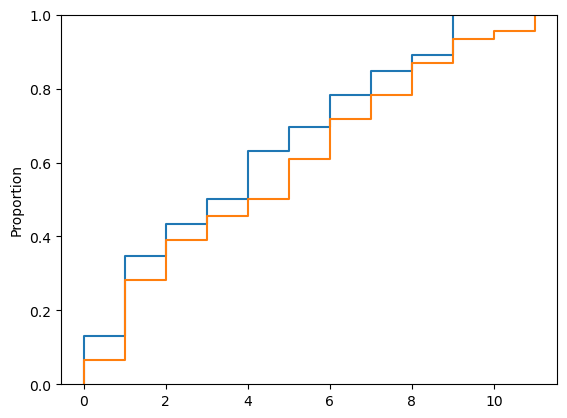

In [ ]:
sns.ecdfplot(data=sv_deg)
sns.ecdfplot(data=gs_deg)

wilcoxon test comparison

In [ ]:
#for degree comparison 
deg_wilcoxin = stats.wilcoxon(x=gs_deg, y=sv_deg)
print(deg_wilcoxin)

#for BC comparison
BC_wilcoxin = stats.wilcoxon(x=gs_weighted_BC_normed, y=sv_weighted_BC_normed)
print(BC_wilcoxin)